In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy as sqmy

In [2]:
class QueryDB:
    def __init__(self):
        # Create an SQLite engine
        self.engine = sqmy.create_engine("sqlite:///customer.db")

    def execute(self, qry):
        """Execute the query and return a DataFrame."""
        return pd.read_sql_query(qry, self.engine)

    def plot(self, qry, x_col, y_col, chart_type='line'):
        """Execute the query, and plot the specified x and y columns."""
        df = self.execute(qry)

        # Check if the specified columns exist in the DataFrame
        if x_col not in df.columns or y_col not in df.columns:
            raise ValueError(f"Columns '{x_col}' or '{y_col}' not found in the DataFrame.")

        # Create the plot based on the specified chart type
        plt.figure(figsize=(8, 5))

        if chart_type == 'line':
            plt.plot(df[x_col], df[y_col], marker='o', linestyle='-', color='b', label=y_col)
        elif chart_type == 'bar':
            plt.bar(df[x_col], df[y_col], color='b', label=y_col)
        elif chart_type == 'scatter':
            plt.scatter(df[x_col], df[y_col], color='b', label=y_col)
        elif chart_type == 'hist':
            plt.hist(df[y_col], bins=20, color='b', alpha=0.7)
        elif chart_type == 'box':
            plt.boxplot(df[y_col], vert=False, patch_artist=True)
            plt.yticks([1], [y_col])
        elif chart_type == 'pie':
            plt.pie(df[y_col], labels=df[x_col], autopct='%1.1f%%', startangle=90)
            plt.axis('equal')
        elif chart_type == 'area':
            plt.fill_between(df[x_col], df[y_col], color='b', alpha=0.3)
        elif chart_type == 'heatmap':
            sns.heatmap(df.pivot_table(values=y_col, index=x_col, aggfunc='sum'), cmap='Blues')
        elif chart_type == 'violin':
            plt.violinplot(df[y_col], showmeans=True)
            plt.xticks([1], [y_col])
        else:
            raise ValueError(f"Unsupported chart type: '{chart_type}'. Choose from 'line', 'bar', 'scatter', 'hist', 'box', 'pie', 'area', 'heatmap', or 'violin'.")

        # Customize the plot
        plt.title(f'{y_col} by {x_col}')
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.xticks(rotation=45)
        plt.legend()
        # plt.grid()
        plt.tight_layout()
        plt.show()

    def plot_stacked_bar(self, qry, x_col, y_col, stack_col):
        """Execute the query and plot a stacked bar chart."""
        df = self.execute(qry)

        # Check if the specified columns exist in the DataFrame
        if x_col not in df.columns or y_col not in df.columns or stack_col not in df.columns:
            raise ValueError(f"Columns '{x_col}', '{y_col}', or '{stack_col}' not found in the DataFrame.")

        # Create a pivot table for stacking
        pivot_df = df.pivot_table(index=x_col, columns=stack_col, values=y_col, aggfunc='sum', fill_value=0)

        # Create the stacked bar chart
        pivot_df.plot(kind='bar', stacked=True, figsize=(8, 5))

        # Customize the plot
        plt.title(f'Stacked Bar Chart of {y_col} by {x_col} with {stack_col}')
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.xticks(rotation=45)
        plt.legend(title=stack_col)
        # plt.grid(axis='y')
        plt.tight_layout()
        plt.show()

    def __del__(self):
        """Close the engine connection when the instance is deleted."""
        self.engine.dispose()


In [3]:
db = QueryDB()

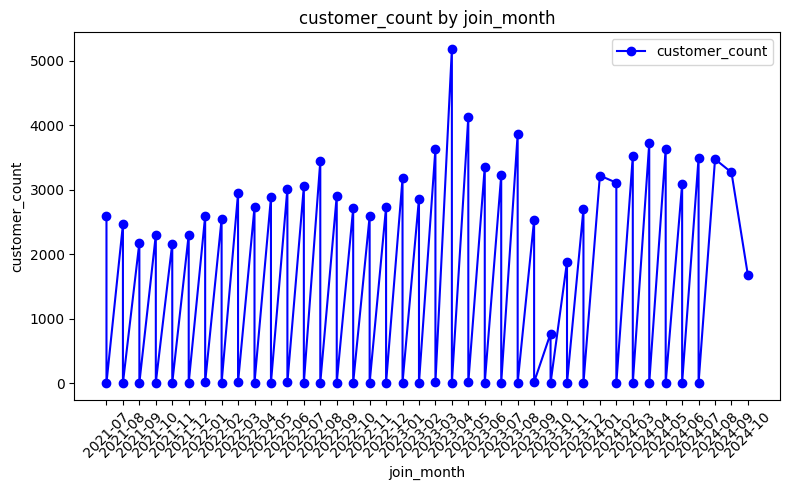

In [4]:
qry = """
SELECT strftime('%Y-%m', CUSTOMER_JOIN_DATE) AS join_month, COUNT(*) AS customer_count, CUSTOMER_STATUS
FROM INFO
GROUP BY join_month, CUSTOMER_STATUS
"""
# db.execute(qry)
db.plot(qry, "join_month", "customer_count", "line")

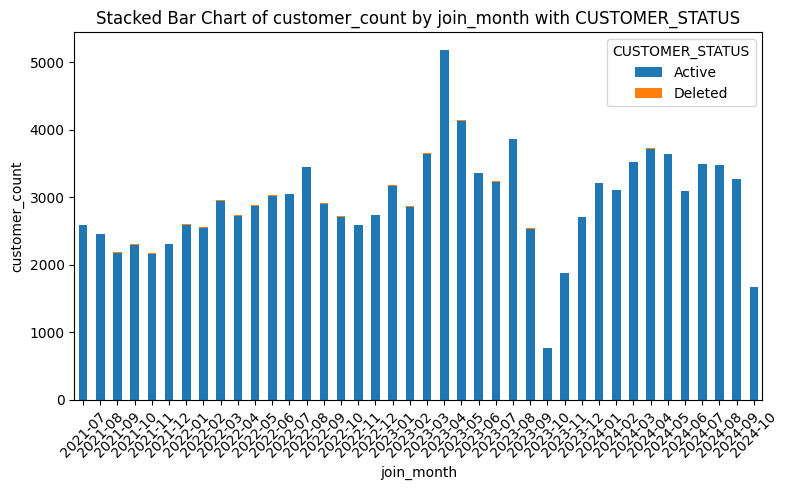

In [5]:
db.plot_stacked_bar(qry, "join_month", "customer_count", "CUSTOMER_STATUS")